# **Project: Credit Classification**

The primary goal of this project is to predict low credit score customers based on various features from a dataset of credit transactions. The project aims to develop a classification model capable of identifying customers with low credit scores.

This project is divided into three parts and constitutes the midcourse project for the Maven Analytics **Data Science in Python: Classification** course.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data

## Step 1: Data Prep & EDA

1. Import the data - perform any datatype conversion as necessary
2. Modify the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare your data for modelling. Create dummy variables, split your data into train and test, and scale your features if necessary.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN", "ID", "Customer_ID"], axis=1)

credit_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [2]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

##### **Target Variable** - *predict low crdit score customers*

In [3]:
credit_df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [4]:
# combine good and standard 
cred_map = {
    'Standard': 'Good or Standard',
    'Poor': 'Poor',
    'Good': 'Good or Standard'
}

credit_df['Credit_Score'] = credit_df['Credit_Score'].map(cred_map)

In [5]:
credit_df['Credit_Score'].value_counts()

Credit_Score
Good or Standard    71002
Poor                28998
Name: count, dtype: int64

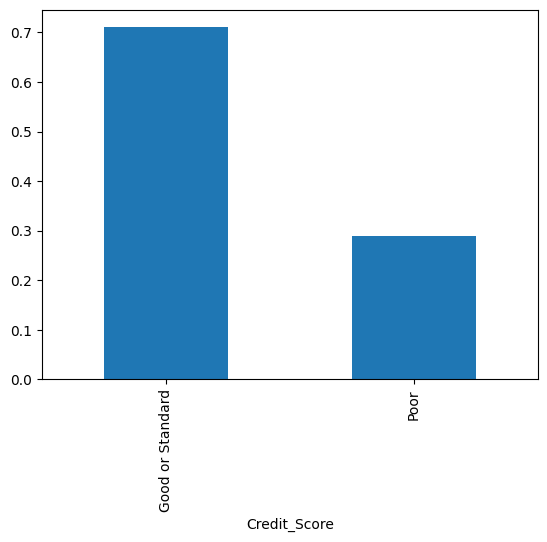

In [6]:
credit_df['Credit_Score'].value_counts(normalize = True).plot.bar();

In [7]:
# created target column

credit_df['Target'] = np.where(credit_df['Credit_Score'] == 'Poor', 1, 0)

In [8]:
credit_df.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Target
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good or Standard,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good or Standard,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good or Standard,0


##### **Exploring the Features**

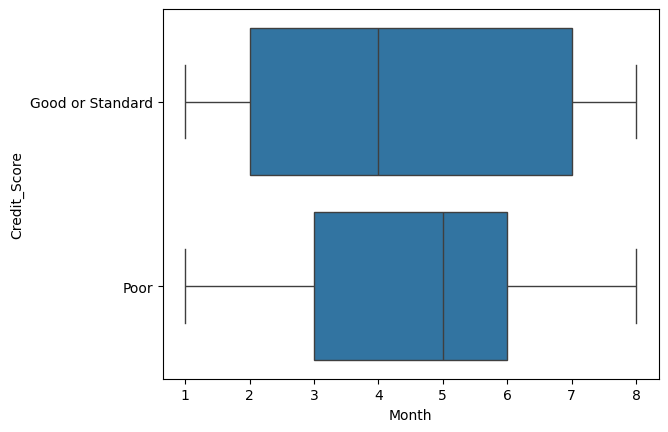

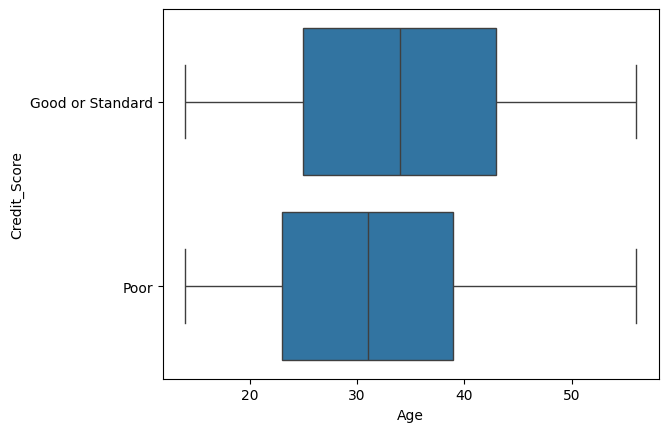

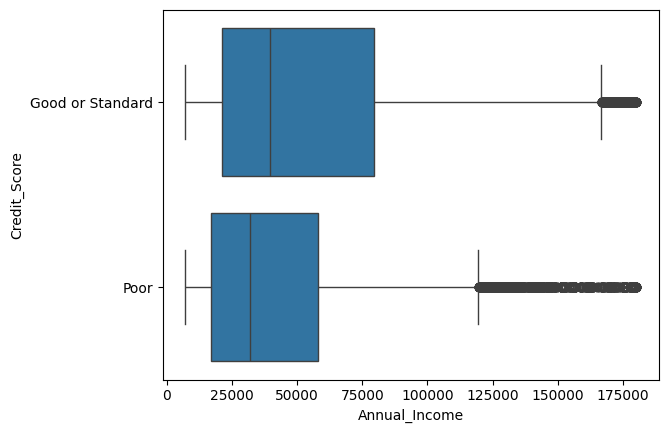

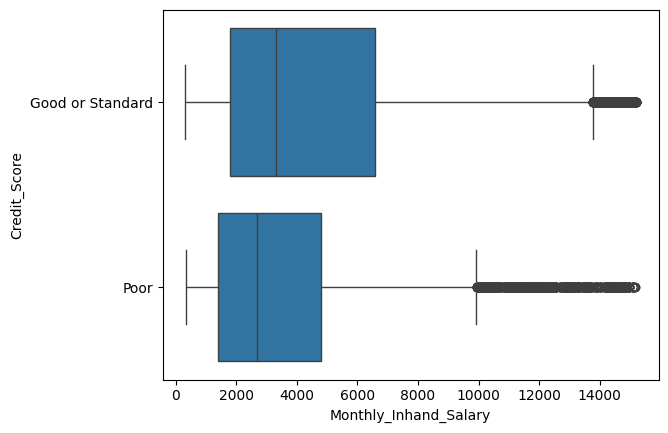

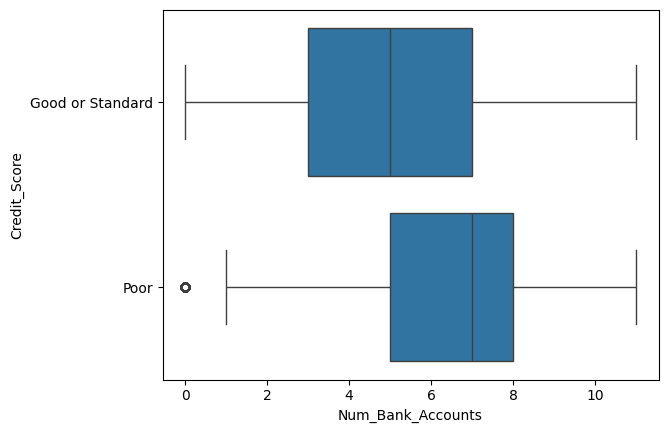

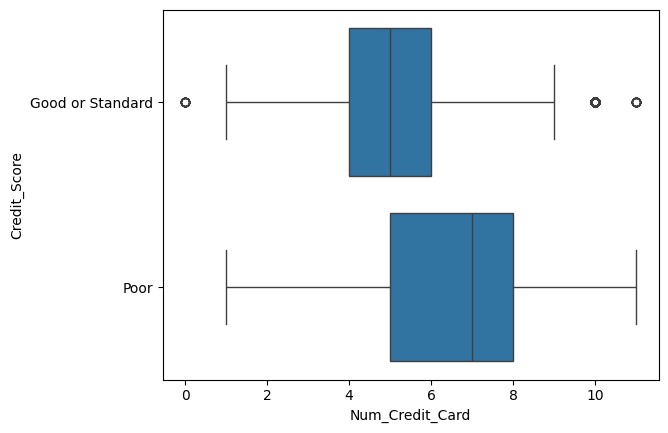

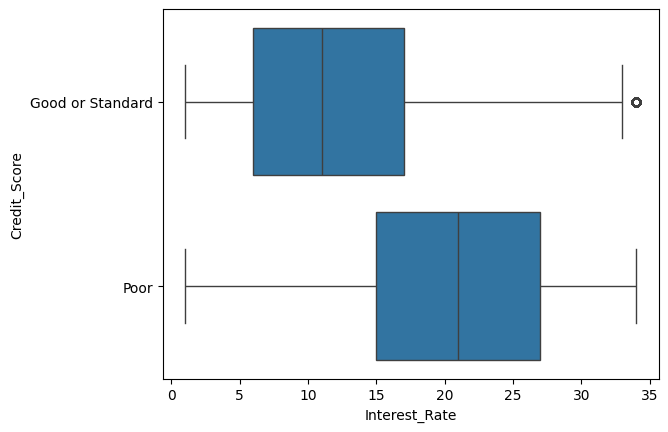

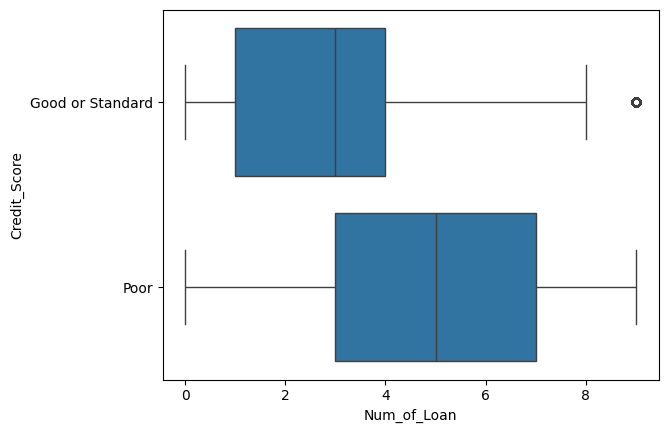

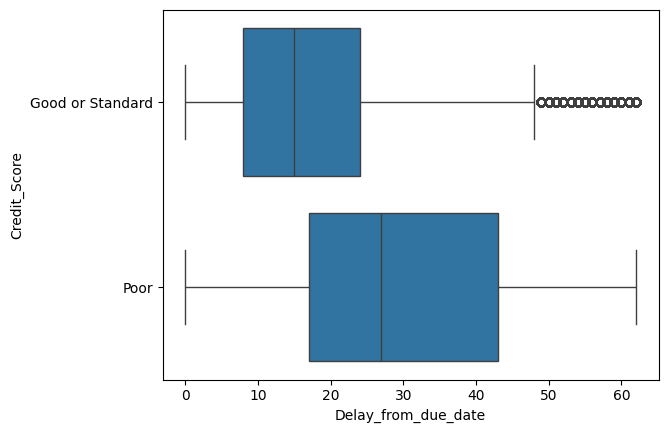

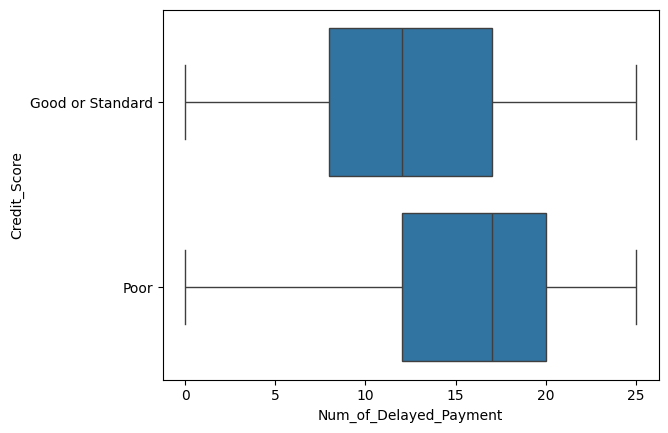

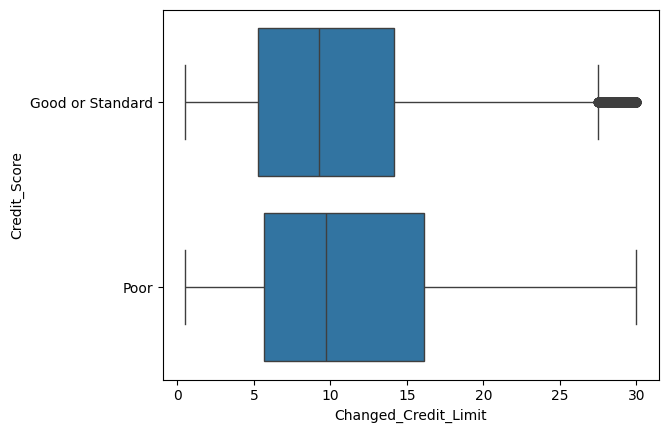

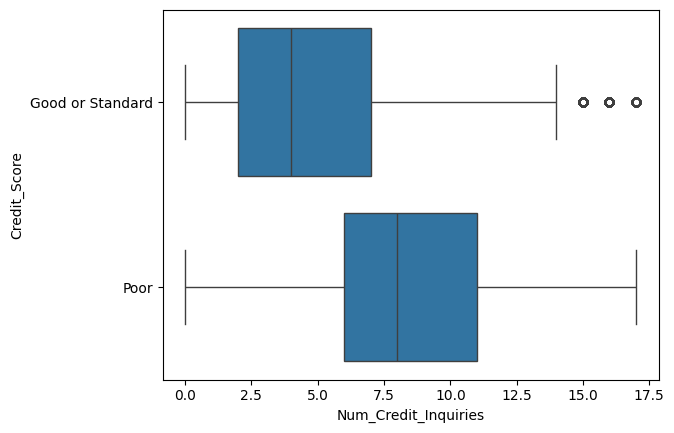

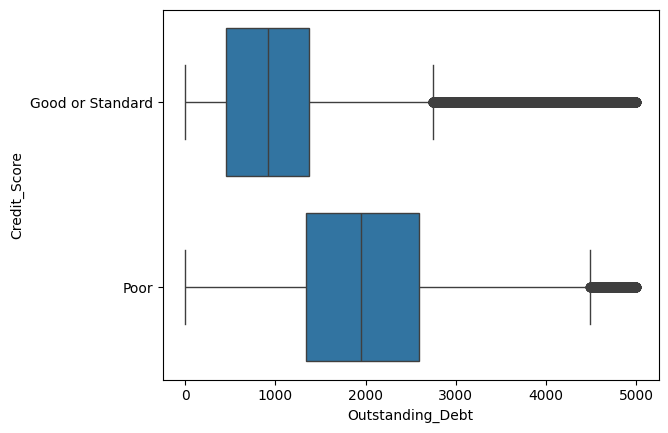

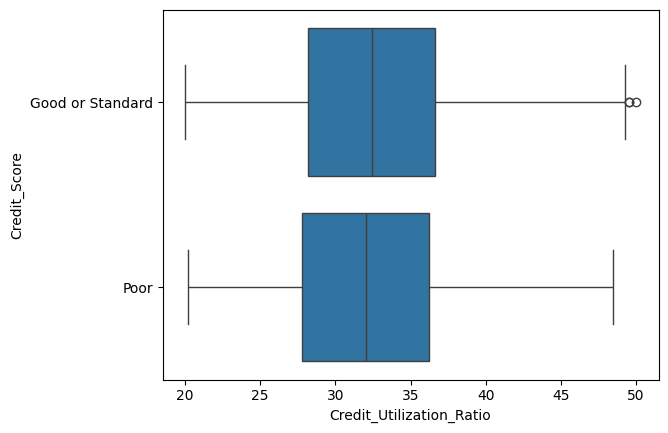

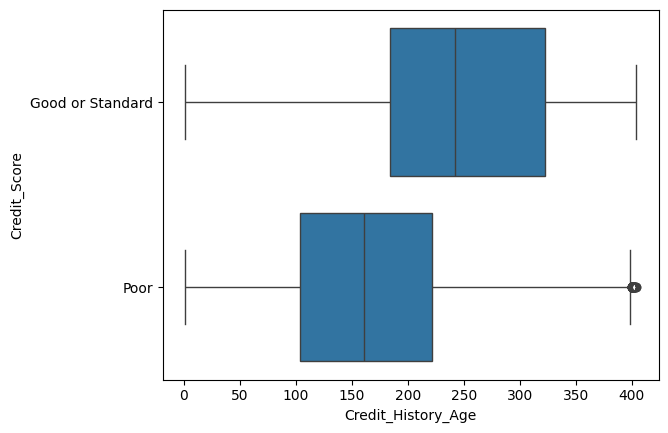

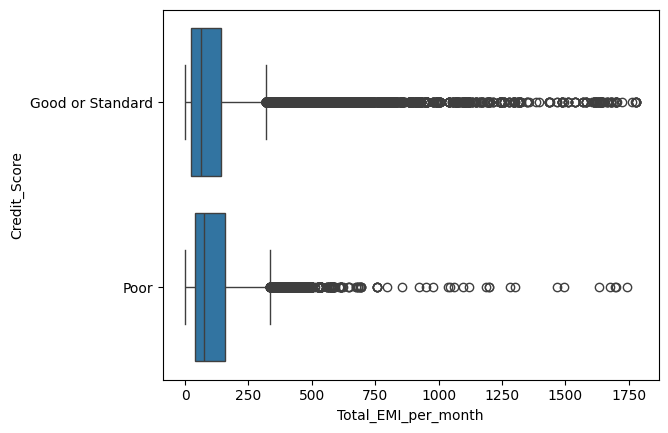

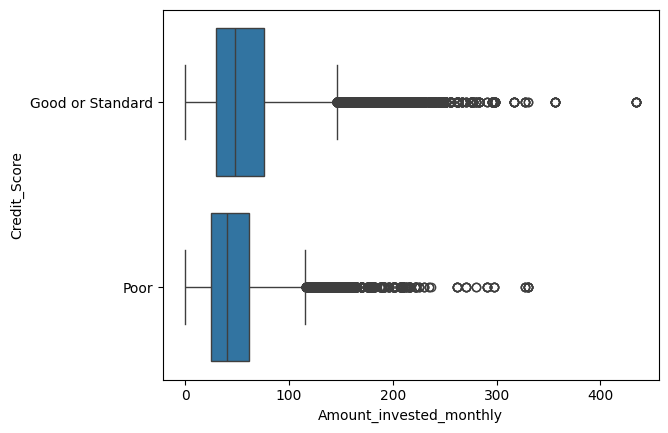

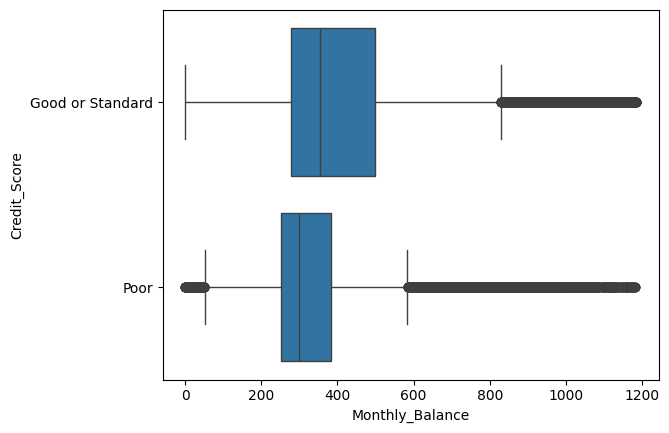

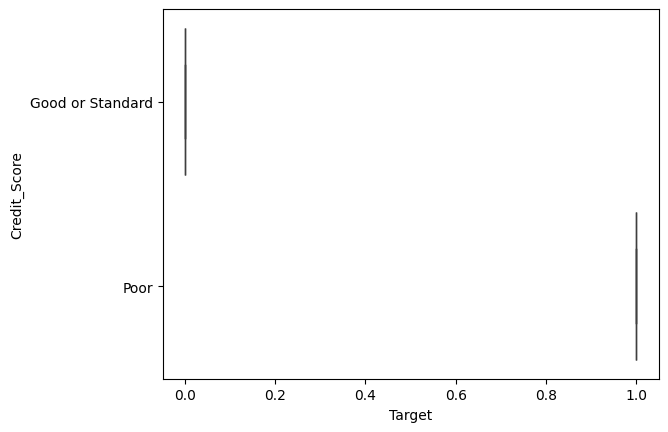

In [9]:
# explore all numeric data

# save all numeric columns into variable
numeric_columns = credit_df.select_dtypes('number').columns

for column in numeric_columns:
    sns.boxplot(x = credit_df[column], y = credit_df['Credit_Score'])
    plt.show()

##### **Numeric Columns Findings**

###### **SIGIFICANT**
Customers with a poor credit score tend to:
* have more bank accounts
* have more credit cards
* borrow at a higher interest rate
* have more loans
* delay payments after due date
* have more delayed payments
* inquire about credits more often
* have more outstanding debt
* have shorter credit history

###### **LESS SIGNIFICANT**
Customers with a poor credit score tend to:
* be younger
* have lower yearly salary
* have lower monthly inhand income (highly correlated with yearly salary)
* have lower monthly balance

###### **MAY BE NOT SIGNIFICANT**
* change credit limits
* total EMI per month
* amount invested monthly
* credit utilisation rate

In [10]:
credit_df['Type_of_Loan'].value_counts()

# drop this column from the model, too many categories, either no data or categories mixed with each other

Type_of_Loan
No Data                                                                                    11408
not specified                                                                               1408
credit-builder loan                                                                         1280
personal loan                                                                               1272
debt consolidation loan                                                                     1264
                                                                                           ...  
auto loan,payday loan,auto loan,student loan,student loan,student loan,home equity loan        8
home equity loan,payday loan,not specified,personal loan                                       8
home equity loan,auto loan,auto loan,auto loan                                                 8
payday loan,student loan,mortgage loan,not specified                                           8
mortgage loan,deb

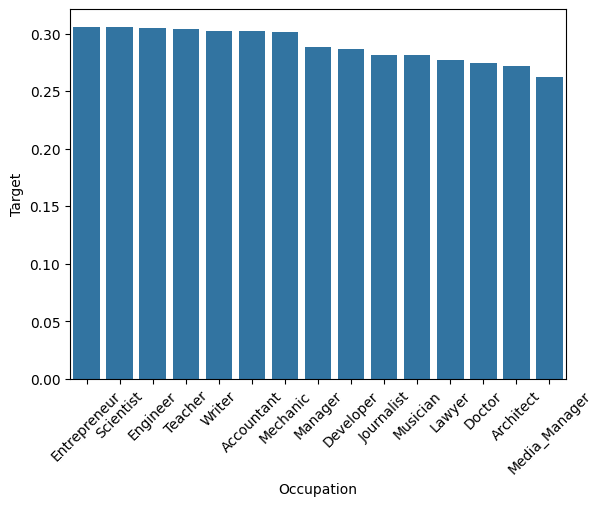

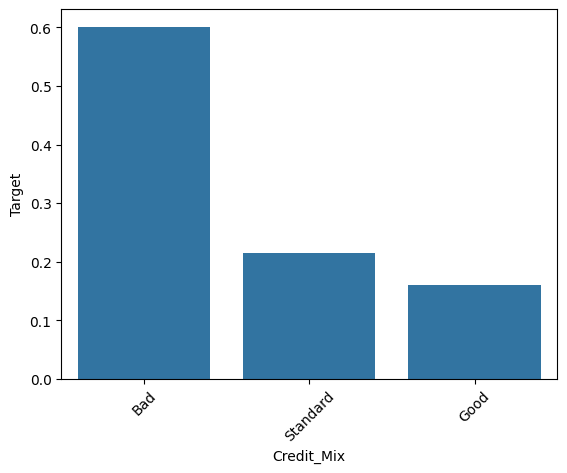

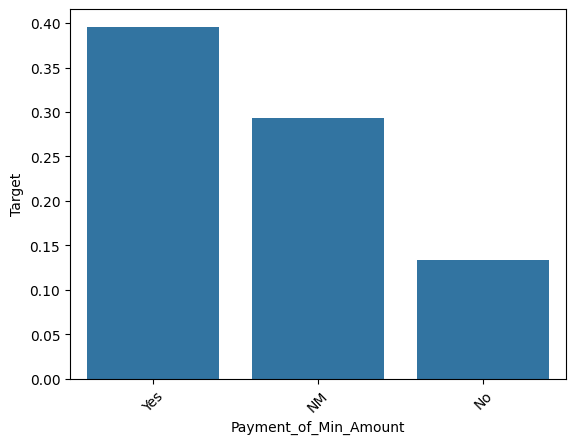

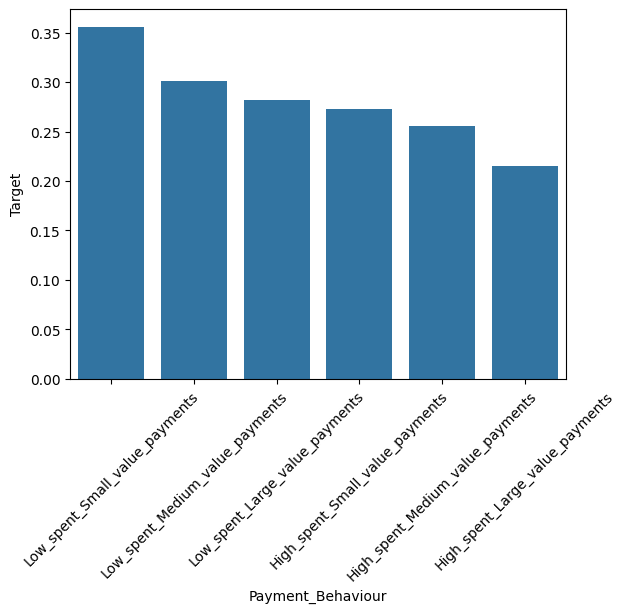

In [11]:
# explore all object data

# save all object columns into variable
columns_obj = credit_df.drop(['Type_of_Loan', 'Credit_Score'], axis = 1).select_dtypes('object').columns

for column in columns_obj:
    sns.barplot(
        data = (
            credit_df
            .groupby(column, as_index = True)
            .agg({'Target': 'mean'})
            .sort_values(by= 'Target', ascending = False)
        ),
        x = column,
        y = 'Target'
    )
    plt.xticks(rotation = 45)
    plt.show()

##### **Object Columns Findings**

###### **SIGIFICANT**
* payment of minimum amount
* payment behaviour
* credit mix

###### **NOT SIGNIFICANT**
* loan type
* occupation

##### **Correlation**

In [12]:
corr = credit_df.corr(numeric_only = True)

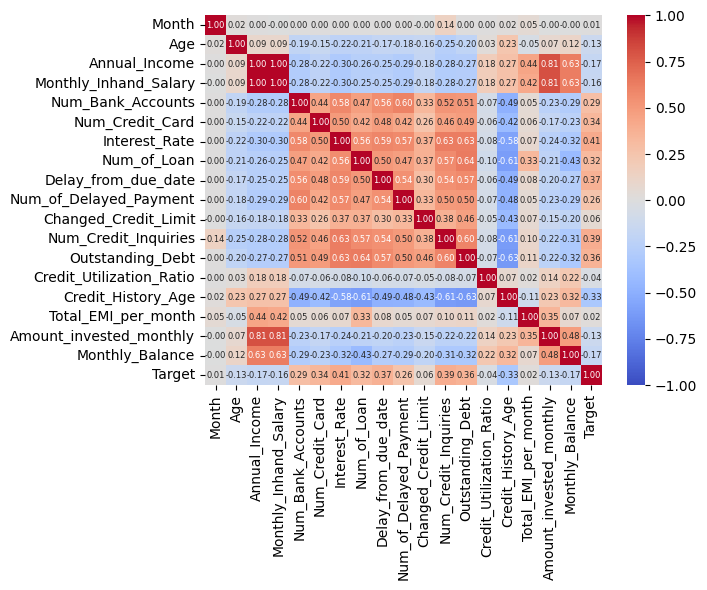

In [13]:
sns.heatmap(
    corr,
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = 'coolwarm',
    annot_kws={"fontsize": 6},
    fmt='.2f'
);

In [14]:
# as expected month, credit utilisation ratio, EMI per month, age, annual income, salary, amount invested are not highly correlated
# drop these columns, create age_annual income column and check correlation after

In [15]:
credit_df = credit_df.assign(
    Age_Annual_Income = credit_df['Age'] * credit_df['Annual_Income'],
    Age_Change_Limit = credit_df['Age'] * credit_df['Changed_Credit_Limit']
)

In [16]:
credit_df.select_dtypes('number').columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Target', 'Age_Annual_Income', 'Age_Change_Limit'],
      dtype='object')

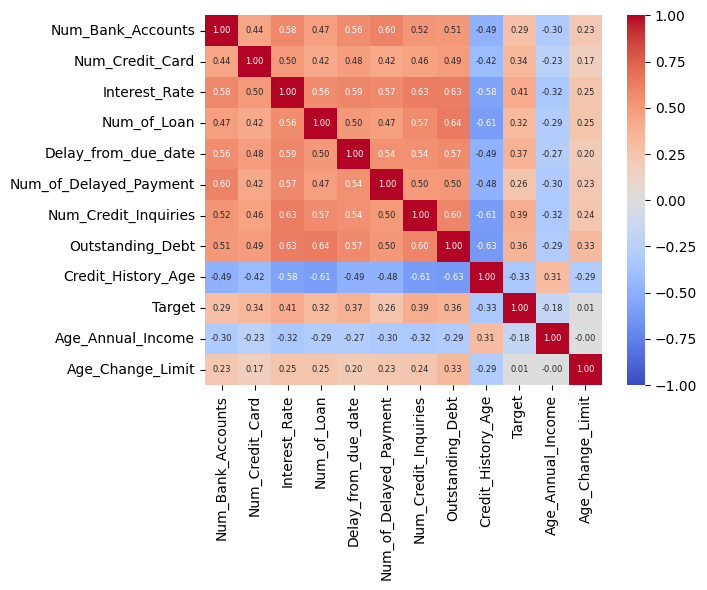

In [17]:
sns.heatmap(
    credit_df.drop(
        [
            'Month',
            'Age', 
            'Annual_Income', 
            'Monthly_Inhand_Salary', 
            'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 
            'Amount_invested_monthly',
            'Monthly_Balance',
            'Changed_Credit_Limit'
        ],
        axis = 1
    ).corr(numeric_only = True),
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = 'coolwarm',
    annot_kws={"fontsize": 6},
    fmt='.2f'
);

In [18]:
columns = credit_df.drop(
        [
            'Occupation',
            'Month',
            'Age', 
            'Annual_Income', 
            'Monthly_Inhand_Salary', 
            'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 
            'Amount_invested_monthly',
            'Monthly_Balance',
            'Changed_Credit_Limit',
            'Age_Change_Limit',
            'Target',
            'Type_of_Loan'
        ],
        axis = 1
    )
columns.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age_Annual_Income
0,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,265.0,No,High_spent_Small_value_payments,Good or Standard,439624.76
1,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Good,809.98,266.0,No,Low_spent_Large_value_payments,Good or Standard,439624.76
2,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,267.0,No,Low_spent_Medium_value_payments,Good or Standard,439624.76
3,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Good,809.98,268.0,No,Low_spent_Small_value_payments,Good or Standard,439624.76
4,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Good,809.98,269.0,No,High_spent_Medium_value_payments,Good or Standard,439624.76


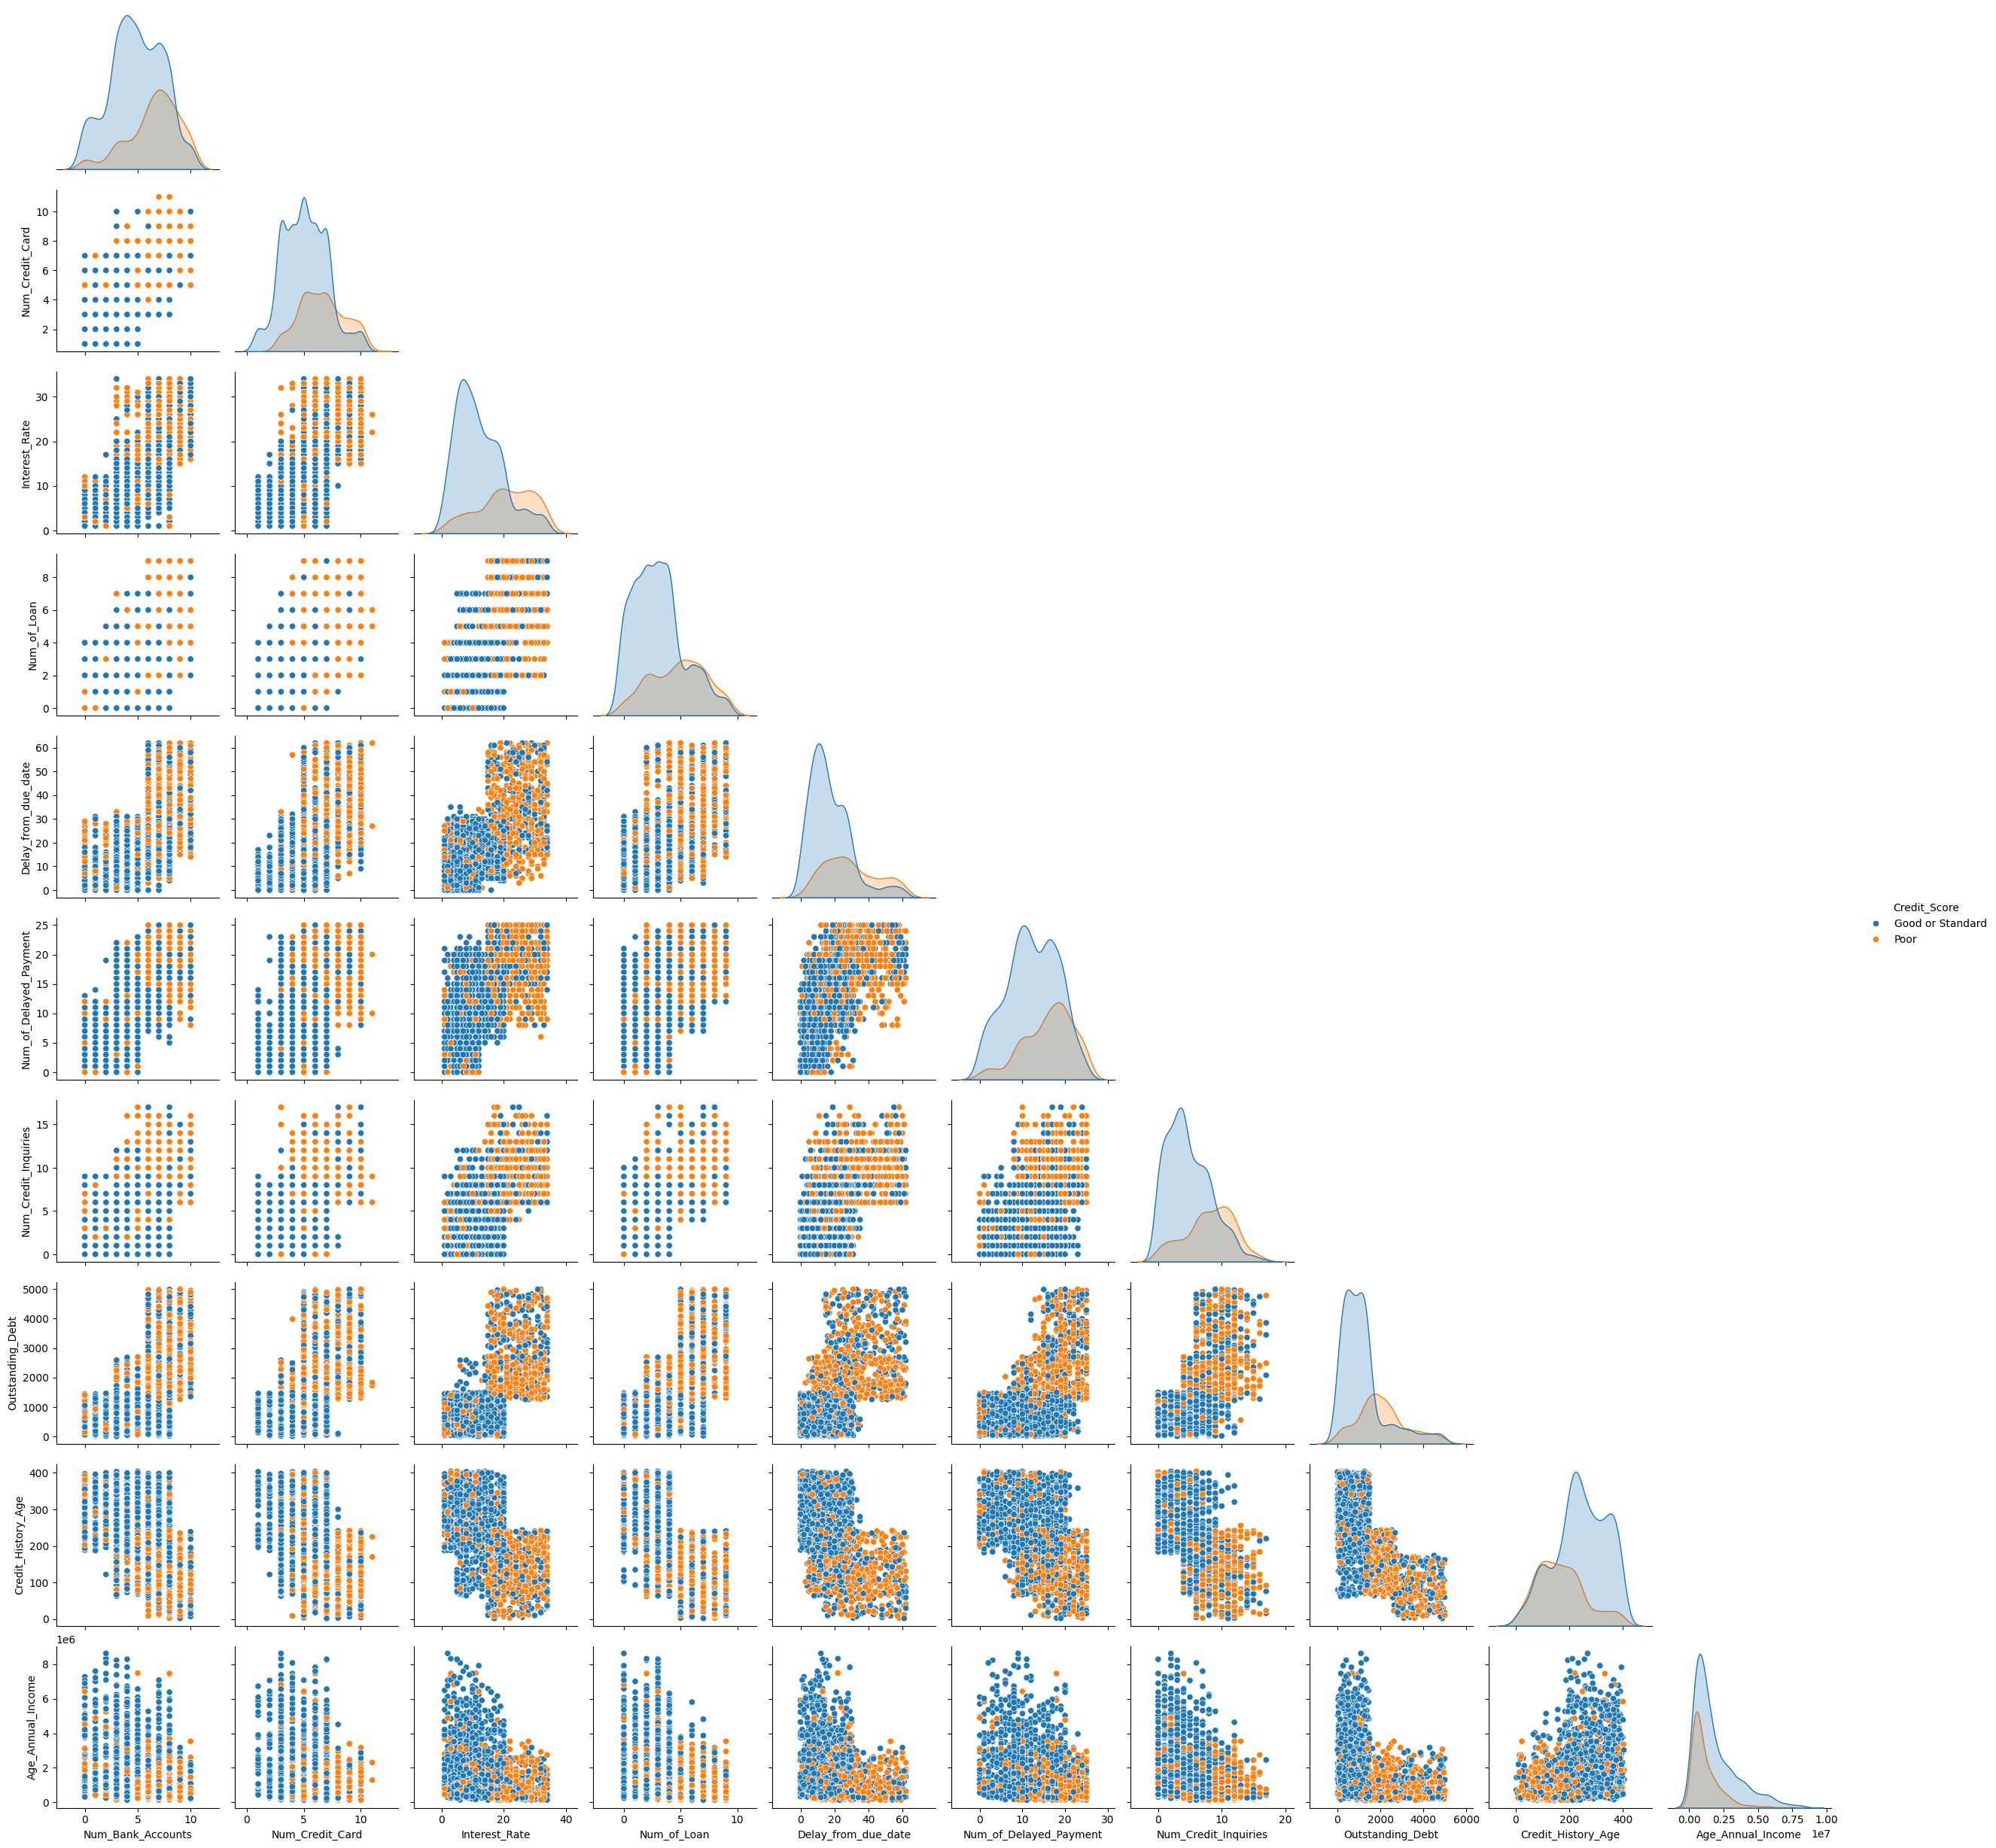

In [19]:
sns.pairplot(columns.sample(2000), hue = 'Credit_Score', corner = True);

# there seem to be a number of features highly correlated to each other

##### **Prepare and save final model dataset**

In [80]:
# save final model df to a new df for ease of use
model_df = credit_df.drop(
        [
            'Occupation',
            'Age_Annual_Income',
            'Age_Change_Limit',
            'Credit_Score',
            'Type_of_Loan'
        ],
        axis = 1
    )
model_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Target
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


##### **Split and Standardise Data**

In [88]:
model_df.columns.to_list()

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Target']

In [159]:
# create list of features
features = [
    "Age",
    "Month",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Interest_Rate",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month",
]

# assign features and target variables
X = pd.get_dummies(model_df[features], dtype = 'int', drop_first = True)
y = model_df['Target']

# split data
X_m, X_test, y_m, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)
X_train, X_valid, y_train, y_valid = train_test_split(X_m, y_m, test_size = 0.25, random_state = 2023) 

In [183]:
print(f'Train & Valid Size: {X_m.shape[0]}, Test Size: {X_test.shape[0]}, Training Size: {X_train.shape[0]}, Validation Size: {X_valid.shape[0]}')

Train & Valid Size: 80000, Test Size: 20000, Training Size: 60000, Validation Size: 20000


In [250]:
# scale data
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_valid)

## Step 2: Logistic Regression

1. Fit a Logistic Regression Model that uses default hyperparameters.
2. Tune the hyperparameters of your logistic regression model
3. Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
4. Plot the ROC curve and report AUC for your tuned model

##### **Fit a Logistic Regression Model**

In [251]:
# fit logistic regression model
logreg = LogisticRegression()
lr = logreg.fit(X_train_std, y_train)
lr

LogisticRegression()

In [252]:
print(f'Train Score: {lr.score(X_train_std, y_train)}')
print(f'Valid Score: {lr.score(X_val_std, y_valid)}')

Train Score: 0.7910666666666667
Valid Score: 0.7857


In [253]:
# tune hyperparameters

# Define the hyperparameters to tune
parameters = {
    'C': np.linspace(0.1, 1.1, 11),            # Regularization strength
    'penalty': ['l1', 'l2']   # Regularization method
}

# Initialize GridSearchCV with LogisticRegression
# Using 'saga' solver for compatibility with 'elasticnet' penalty and a higher max_iter for convergence
gridsearch = GridSearchCV(LogisticRegression(solver='saga', max_iter = 1000), parameters)

# Fit the model to the training data
gridsearch.fit(X_train_std, y_train)

# Output the best hyperparameters found by the grid search
gridsearch.best_params_

{'C': np.float64(0.30000000000000004), 'penalty': 'l1'}

In [254]:
# fit model with scaled data and tuned params
logreg = LogisticRegression(**gridsearch.best_params_, solver = 'saga')
lr_tuned = logreg.fit(X_train_std, y_train)

In [261]:
print(f'Train Score: {lr_tuned.score(X_train_std, y_train)}')
print(f'Valid Score: {lr_tuned.score(X_val_std, y_valid)}')
print('------')
print('Default parameters give almost the same results')

Train Score: 0.7912333333333333
Valid Score: 0.7853
------
Default parameters give almost the same results


##### **Model Scoring**

In [262]:
print('Confusion Matrix before any threshold tuning')
print(f'{confusion_matrix(y_train, lr.predict(X_train_std))} Train CM')
print('-----')
print(f'{confusion_matrix(y_test, lr.predict(X_test_std))} Valid CM')

Confusion Matrix before any threshold tuning
[[38413  4244]
 [ 8292  9051]] Train CM
-----
[[12778  1407]
 [ 2821  2994]] Valid CM


In [263]:
print(f'Train Score: {lr.score(X_train_std, y_train)}')
print(f'Valid Score: {lr.score(X_val_std, y_valid)}')
print('-----')
print(f'Train Precision Score: {precision_score(y_train, lr.predict(X_train_std))}')
print(f'Valid Precision Score: {precision_score(y_valid, lr.predict(X_val_std))}')
print('-----')
print(f'Train Recall Score: {recall_score(y_train, lr.predict(X_train_std))}')
print(f'Valid Recall Score: {recall_score(y_valid, lr.predict(X_val_std))}')
print('-----')
print(f'Train F1 Score: {f1_score(y_train, lr.predict(X_train_std))}')
print(f'Valid F1 Score: {f1_score(y_valid, lr.predict(X_val_std))}')

Train Score: 0.7910666666666667
Valid Score: 0.7857
-----
Train Precision Score: 0.6807822489657767
Valid Precision Score: 0.675
-----
Train Recall Score: 0.5218820273309116
Valid Recall Score: 0.5131849315068493
-----
Train F1 Score: 0.590834910894967
Valid F1 Score: 0.5830739299610895


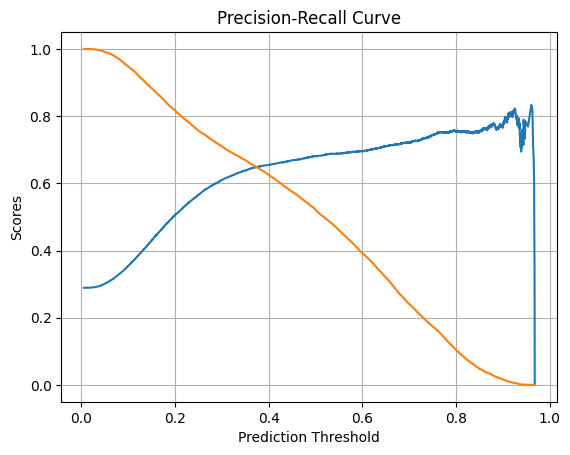

In [264]:
# plot the precision-recall curve

from sklearn.metrics import precision_recall_curve
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

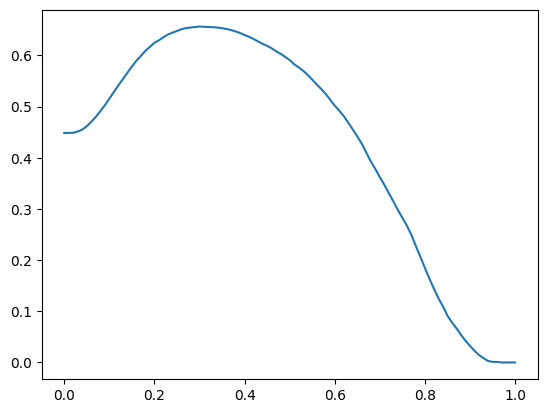

In [265]:
# tune f1

from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1);

In [266]:
# calculate the max f1 threshold

max_thresh = thresholds[f1.index(max(f1))]
max_thresh

np.float64(0.3)

In [267]:
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print(f'Train Accuracy Score: {accuracy_score(y_train, lr.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Precision Score: {precision_score(y_train, lr.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Recall Score: {recall_score(y_train, lr.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train F1 Score: {f1_score(y_train, lr.predict_proba(X_train_std)[:,1] > max_thresh)}')
print('-----')
print(f'Valid Accuracy Score: {accuracy_score(y_valid, lr.predict_proba(X_val_std)[:,1] > max_thresh)}')
print(f'Valid Precision Score: {precision_score(y_valid, lr.predict_proba(X_val_std)[:,1] > max_thresh)}')
print(f'Valid Recall Score: {recall_score(y_valid, lr.predict_proba(X_val_std)[:,1] > max_thresh)}')
print(f'Valid F1 Score: {f1_score(y_valid, lr.predict_proba(X_val_std)[:,1] > max_thresh)}')

Train Accuracy Score: 0.78505
Train Precision Score: 0.6100822026344459
Train Recall Score: 0.7103730611774203
Train F1 Score: 0.6564189999200789
-----
Valid Accuracy Score: 0.7767
Valid Precision Score: 0.601118634088902
Valid Recall Score: 0.6993150684931507
Valid F1 Score: 0.6465094190280196


In [268]:
print('Confusion Matrix after threshold tuning')
print(f'{confusion_matrix(y_train, lr.predict_proba(X_train_std)[:,1]> max_thresh)} Train CM')
print('-----')
print(f'{confusion_matrix(y_valid, lr.predict_proba(X_val_std)[:,1]> max_thresh)} Valid CM')

Confusion Matrix after threshold tuning
[[34783  7874]
 [ 5023 12320]] Train CM
-----
[[11450  2710]
 [ 1756  4084]] Valid CM


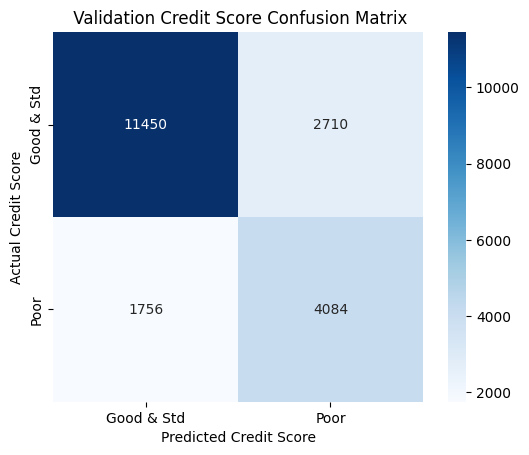

In [269]:
y_pred = lr.predict_proba(X_val_std)[:,1]> max_thresh

lr_confusion = confusion_matrix(y_valid, y_pred)

sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good & Std", "Poor"],        
    yticklabels=["Good & Std", "Poor"]
).set(
    xlabel='Predicted Credit Score',
    ylabel='Actual Credit Score',
    title=' Validation Credit Score Confusion Matrix'
);

##### **ROC curve and AUC score**

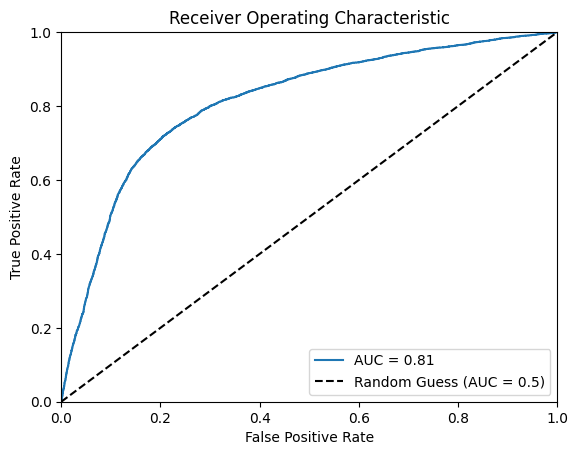

In [270]:
from sklearn.metrics import roc_curve, auc

# Generate ROC AUC for tuned model
y_probs = lr.predict_proba(X_val_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)
auc_score = auc(fpr, tpr)

# build plot

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)
plt.plot([0, 1],[0, 1], 'k--', label = 'Random Guess (AUC = 0.5)')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Step 3. Imbalanced Data Techniques

1. Try using SMOTE, by resampling up to an equal number of 0s and 1s, then tune your model threshold. 
2. Did this improve your model performance in terms of accuracy, F1, and AUC?

In [271]:
import imblearn.over_sampling as OS  # Import the imbalanced-learn library for oversampling

# Initialize the SMOTE with the defined sampling strategy and a random state for reproducibility
smt = OS.SMOTE(
    sampling_strategy= 'auto',
    random_state=2023
)

# Apply the SMOTE to the training data
# X_train_rs and y_train_rs will be the resampled feature set and target set respectively
X_train_rs, y_train_rs = smt.fit_resample(X_train_std, y_train)

# Print the count of positive samples before and after oversampling for verification
print(f'Original Positive Class Count: {np.sum(y_train == 1)}')
print(f'Oversample Positive Class Count: {np.sum(y_train_rs == 1)}')

Original Positive Class Count: 17343
Oversample Positive Class Count: 42657


In [272]:
# fit model with resampled scaled data 
logreg = LogisticRegression()
lr_smt = logreg.fit(X_train_rs, y_train_rs)

In [273]:
print(f'Train Score: {lr_smt.score(X_train_rs, y_train_rs)}')
print(f'Valid Score: {lr_smt.score(X_val_std, y_valid)}')
print('-----')
print(f'Train Precision Score: {precision_score(y_train_rs, lr_smt.predict(X_train_rs))}')
print(f'Valid Precision Score: {precision_score(y_valid, lr_smt.predict(X_val_std))}')
print('-----')
print(f'Train Recall Score: {recall_score(y_train_rs, lr_smt.predict(X_train_rs))}')
print(f'Valid Recall Score: {recall_score(y_valid, lr_smt.predict(X_val_std))}')
print('-----')
print(f'Train F1 Score: {f1_score(y_train_rs, lr_smt.predict(X_train_rs))}')
print(f'Valid F1 Score: {f1_score(y_valid, lr_smt.predict(X_val_std))}')

Train Score: 0.7647045033640434
Valid Score: 0.77455
-----
Train Precision Score: 0.7889551398520869
Valid Precision Score: 0.5953575010746526
-----
Train Recall Score: 0.722741871205195
Valid Recall Score: 0.711472602739726
-----
Train F1 Score: 0.7543984143685615
Valid F1 Score: 0.6482564942663235


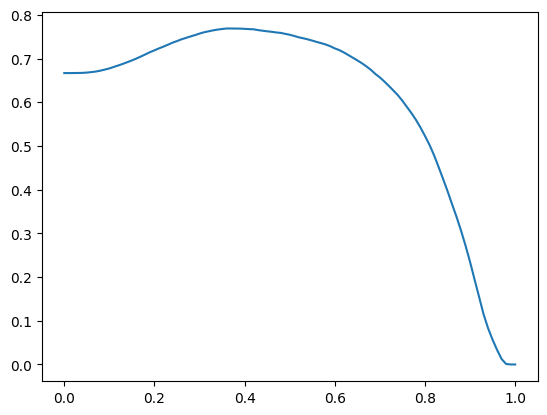

In [274]:
# tune f1

from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_smt.predict_proba(X_train_rs)[:,1]>thresh)
    f1.append(f1_score(y_train_rs, y_pred))
    
sns.lineplot(x=thresholds, y=f1);

In [275]:
# calculate the max f1 threshold

max_thresh_smt = thresholds[f1.index(max(f1))]
max_thresh_smt

np.float64(0.36)

In [276]:
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print(f'Train Accuracy Score: {accuracy_score(y_train_rs, lr_smt.predict_proba(X_train_rs)[:,1] > max_thresh_smt)}')
print(f'Train Precision Score: {precision_score(y_train_rs, lr_smt.predict_proba(X_train_rs)[:,1] > max_thresh_smt)}')
print(f'Train Recall Score: {recall_score(y_train_rs, lr_smt.predict_proba(X_train_rs)[:,1] > max_thresh_smt)}')
print(f'Train F1 Score: {f1_score(y_train_rs, lr_smt.predict_proba(X_train_rs)[:,1] > max_thresh_smt)}')
print('-----')
print(f'Valid Accuracy Score: {accuracy_score(y_valid, lr_smt.predict_proba(X_val_std)[:,1] > max_thresh_smt)}')
print(f'Valid Precision Score: {precision_score(y_valid, lr_smt.predict_proba(X_val_std)[:,1] > max_thresh_smt)}')
print(f'Valid Recall Score: {recall_score(y_valid, lr_smt.predict_proba(X_val_std)[:,1] > max_thresh_smt)}')
print(f'Valid F1 Score: {f1_score(y_valid, lr_smt.predict_proba(X_val_std)[:,1] > max_thresh_smt)}')

Train Accuracy Score: 0.7476850223878847
Train Precision Score: 0.7095705643161757
Train Recall Score: 0.8386196872728978
Train F1 Score: 0.7687166924531545
-----
Valid Accuracy Score: 0.7062
Valid Precision Score: 0.49815422477440524
Valid Recall Score: 0.8318493150684931
Valid F1 Score: 0.6231400718317086


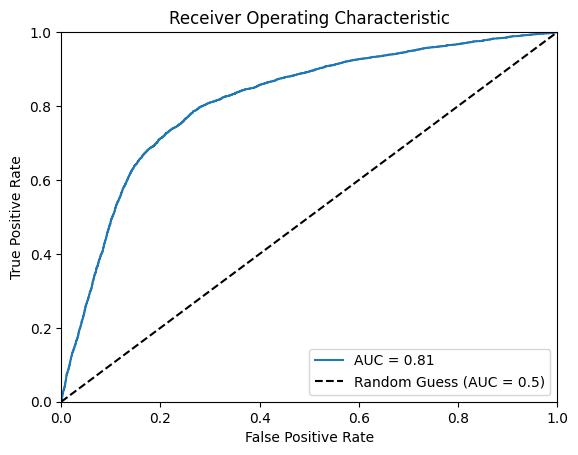

In [277]:
from sklearn.metrics import roc_curve, auc

# Generate ROC AUC for tuned model
y_probs = lr_smt.predict_proba(X_val_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)
auc_score = auc(fpr, tpr)

# build plot

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)
plt.plot([0, 1],[0, 1], 'k--', label = 'Random Guess (AUC = 0.5)')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [241]:
# Resampling actually made the model worse

##### **Final model fit and test scoring**

In [278]:
std = StandardScaler()

X_m_std = std.fit_transform(X_m)
X_test_std = std.transform(X_test)

In [282]:
logreg = LogisticRegression()
lr_m = logreg.fit(X_m_std, y_m)

In [284]:
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print(f'TrainValid Accuracy Score: {accuracy_score(y_m, lr_m.predict_proba(X_m_std)[:,1] > max_thresh)}')
print(f'TrainValid Precision Score: {precision_score(y_m, lr_m.predict_proba(X_m_std)[:,1] > max_thresh)}')
print(f'TrainValid Recall Score: {recall_score(y_m, lr_m.predict_proba(X_m_std)[:,1] > max_thresh)}')
print(f'TrainValid F1 Score: {f1_score(y_m, lr_m.predict_proba(X_m_std)[:,1] > max_thresh)}')
print('-----')
print(f'Test Accuracy Score: {accuracy_score(y_test, lr_m.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'Test Precision Score: {precision_score(y_test, lr_m.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'Test Recall Score: {recall_score(y_test, lr_m.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'Test F1 Score: {f1_score(y_test, lr_m.predict_proba(X_test_std)[:,1] > max_thresh)}')

TrainValid Accuracy Score: 0.7827875
TrainValid Precision Score: 0.6074468872603449
TrainValid Recall Score: 0.7079325367726351
TrainValid F1 Score: 0.6538515169020538
-----
Test Accuracy Score: 0.78485
Test Precision Score: 0.6122327790973872
Test Recall Score: 0.7092003439380912
Test F1 Score: 0.6571587921281172


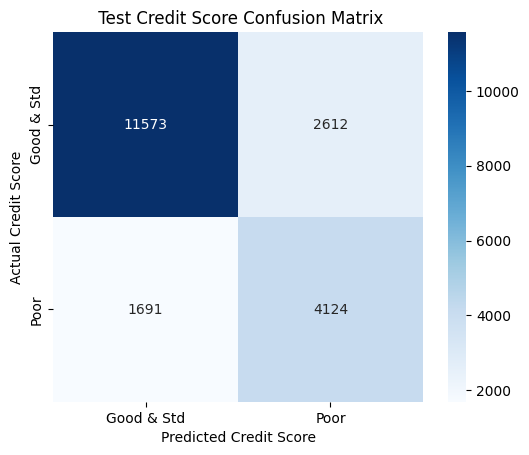

In [287]:
# Confusion matrix for test dataset

y_pred = lr_m.predict_proba(X_test_std)[:,1]> max_thresh

lr_confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good & Std", "Poor"],        
    yticklabels=["Good & Std", "Poor"]
).set(
    xlabel='Predicted Credit Score',
    ylabel='Actual Credit Score',
    title=' Test Credit Score Confusion Matrix'
);